# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely:
1. K Nearest Neighbor, 
2. Logistic Regression, 
3. Decision Trees, and 
4. Support Vector Machines.  

We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [118]:
"17 campains between May 2008 and November 2010"

'17 campains between May 2008 and November 2010'

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [119]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

pd.option_context('mode.use_inf_as_na', True);

In [120]:
df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep = ';')
df_copy = df

In [121]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.

```
Input variables:

# bank client data:
1. *age* (numeric)
2. *job*: type of job (categorical: 'admin', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
3. *marital*: marital status (categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed)
4. *education* (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course',' university.degree', 'unknown')
5. *default*: has credit in default? (categorical: 'no', 'yes', 'unknown')
6. *housing*: has housing loan? (categorical: 'no', 'yes', 'unknown')
7. *loan*: has personal loan? (categorical: 'no', 'yes', 'unknown')

# related with the last contact of the current campaign:
8. *contact*: contact communication type (categorical: 'cellular', 'telephone')
9. *month*: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. *day_of_week*: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
11. *duration*: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

# other attributes:
12. *campaign*: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. *pdays*: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. *previous*: number of contacts performed before this campaign and for this client (numeric)
15. *poutcome*: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')

# social and economic context attributes
16. *emp.var.rate*: employment variation rate - quarterly indicator (numeric)
17. *cons.price.idx*: consumer price index - monthly indicator (numeric)
18. *cons.conf.idx*: consumer confidence index - monthly indicator (numeric)
19. *euribor3m*: euribor 3 month rate - daily indicator (numeric)
20. *nr.employed*: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21. *y*: has the client subscribed a term deposit? (binary: 'yes', 'no')
```

In [123]:
# REMOVE *duration* feature
df = df.drop(['duration'], axis=1)
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  campaign  pdays  previous     poutcome  emp.var.rate  \
0   may         mon         1    999         0  nonexistent           1.1   
1   may         mon         1    999         0  nonexistent           1.1   
2   may         mon         1    999         0  nonexistent           1.1   
3   may         mon         1    999         0  nonexistent           1.1   
4   may         mon         1    999         0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no

In [124]:
# MISSING VALUES

# Check for null
df.isna().sum()

# CONCLUSION: Since all values for all features have no null then nothing to do here

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [125]:
# DATA NEEDS TO BE COERCED
object_features = {k for (k,v) in df.dtypes.to_dict().items() if v == np.object_}
print(object_features)

{'housing', 'education', 'marital', 'contact', 'y', 'default', 'day_of_week', 'month', 'poutcome', 'job', 'loan'}


In [126]:
# RENAME all categorical features as <FeatureName>_code
renamed_features_code = {}
for name in object_features:
    renamed_features_code[name] = name+"_code"
df = df.rename(columns=renamed_features_code)
df.head()

age   job_code marital_code education_code default_code housing_code  \
0   56  housemaid      married       basic.4y           no           no   
1   57   services      married    high.school      unknown           no   
2   37   services      married    high.school           no          yes   
3   40     admin.      married       basic.6y           no           no   
4   56   services      married    high.school           no           no   

  loan_code contact_code month_code day_of_week_code  campaign  pdays  \
0        no    telephone        may              mon         1    999   
1        no    telephone        may              mon         1    999   
2        no    telephone        may              mon         1    999   
3        no    telephone        may              mon         1    999   
4       yes    telephone        may              mon         1    999   

   previous poutcome_code  emp.var.rate  cons.price.idx  cons.conf.idx  \
0         0   nonexistent           1.1          93.994          -36.4   
1         0   nonexistent           1.1          93.994          -36.4   
2         0   nonexistent           1.1          93.994          -36.4   
3         0   nonexistent           1.1          93.994          -36.4   
4         0   nonexistent           1.1          93.994          -36.4   

   euribor3m  nr.employed y_code  
0      4.857       5191.0     no  
1      4.857       5191.0     no  
2      4.857       5191.0     no  
3      4.857       5191.0     no  
4      4.857       5191.0     no

In [127]:
# CONVERT all categorical features to their encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for k, v in renamed_features_code.items():
    df[k] = label_encoder.fit_transform(df[v])
df.head()

age   job_code marital_code education_code default_code housing_code  \
0   56  housemaid      married       basic.4y           no           no   
1   57   services      married    high.school      unknown           no   
2   37   services      married    high.school           no          yes   
3   40     admin.      married       basic.6y           no           no   
4   56   services      married    high.school           no           no   

  loan_code contact_code month_code day_of_week_code  ...  education  marital  \
0        no    telephone        may              mon  ...          0        1   
1        no    telephone        may              mon  ...          3        1   
2        no    telephone        may              mon  ...          3        1   
3        no    telephone        may              mon  ...          1        1   
4       yes    telephone        may              mon  ...          3        1   

   contact  y  default  day_of_week  month  poutcome  job loan  
0        1  0        0            1      6         1    3    0  
1        1  0        1            1      6         1    7    0  
2        1  0        0            1      6         1    7    0  
3        1  0        0            1      6         1    0    0  
4        1  0        0            1      6         1    7    2  

[5 rows x 31 columns]

In [128]:
# Get all features with numbers dtype
number_features = {k for (k,v) in df.dtypes.to_dict().items() if v != np.object_}
df_code = df
df = df[list(number_features)]

In [129]:
df.head()

emp.var.rate  education  default  job  cons.conf.idx  month  loan  housing  \
0           1.1          0        0    3          -36.4      6     0        0   
1           1.1          3        1    7          -36.4      6     0        0   
2           1.1          3        0    7          -36.4      6     0        2   
3           1.1          1        0    0          -36.4      6     0        0   
4           1.1          3        0    7          -36.4      6     2        0   

   marital  previous  contact  campaign  cons.price.idx  age  y  day_of_week  \
0        1         0        1         1          93.994   56  0            1   
1        1         0        1         1          93.994   57  0            1   
2        1         0        1         1          93.994   37  0            1   
3        1         0        1         1          93.994   40  0            1   
4        1         0        1         1          93.994   56  0            1   

   nr.employed  pdays  euribor3m  poutcome  
0       5191.0    999      4.857         1  
1       5191.0    999      4.857         1  
2       5191.0    999      4.857         1  
3       5191.0    999      4.857         1  
4       5191.0    999      4.857         1

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   emp.var.rate    41188 non-null  float64
 1   education       41188 non-null  int64  
 2   default         41188 non-null  int64  
 3   job             41188 non-null  int64  
 4   cons.conf.idx   41188 non-null  float64
 5   month           41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   housing         41188 non-null  int64  
 8   marital         41188 non-null  int64  
 9   previous        41188 non-null  int64  
 10  contact         41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  cons.price.idx  41188 non-null  float64
 13  age             41188 non-null  int64  
 14  y               41188 non-null  int64  
 15  day_of_week     41188 non-null  int64  
 16  nr.employed     41188 non-null  float64
 17  pdays           41188 non-null 

In [132]:
# PROBLEM statement
# Compare performance of classifiers: KNN, LR, DT, SVM 
# Objective is to find variable that can predict the target `y` variable which indicate yes or no if campain resulted in successful campain

In [133]:
# X, y variable
y = df.y
X = df.drop('y', axis=1)

# Sample the data
sample_df = df.sample(n=1000, random_state=42)

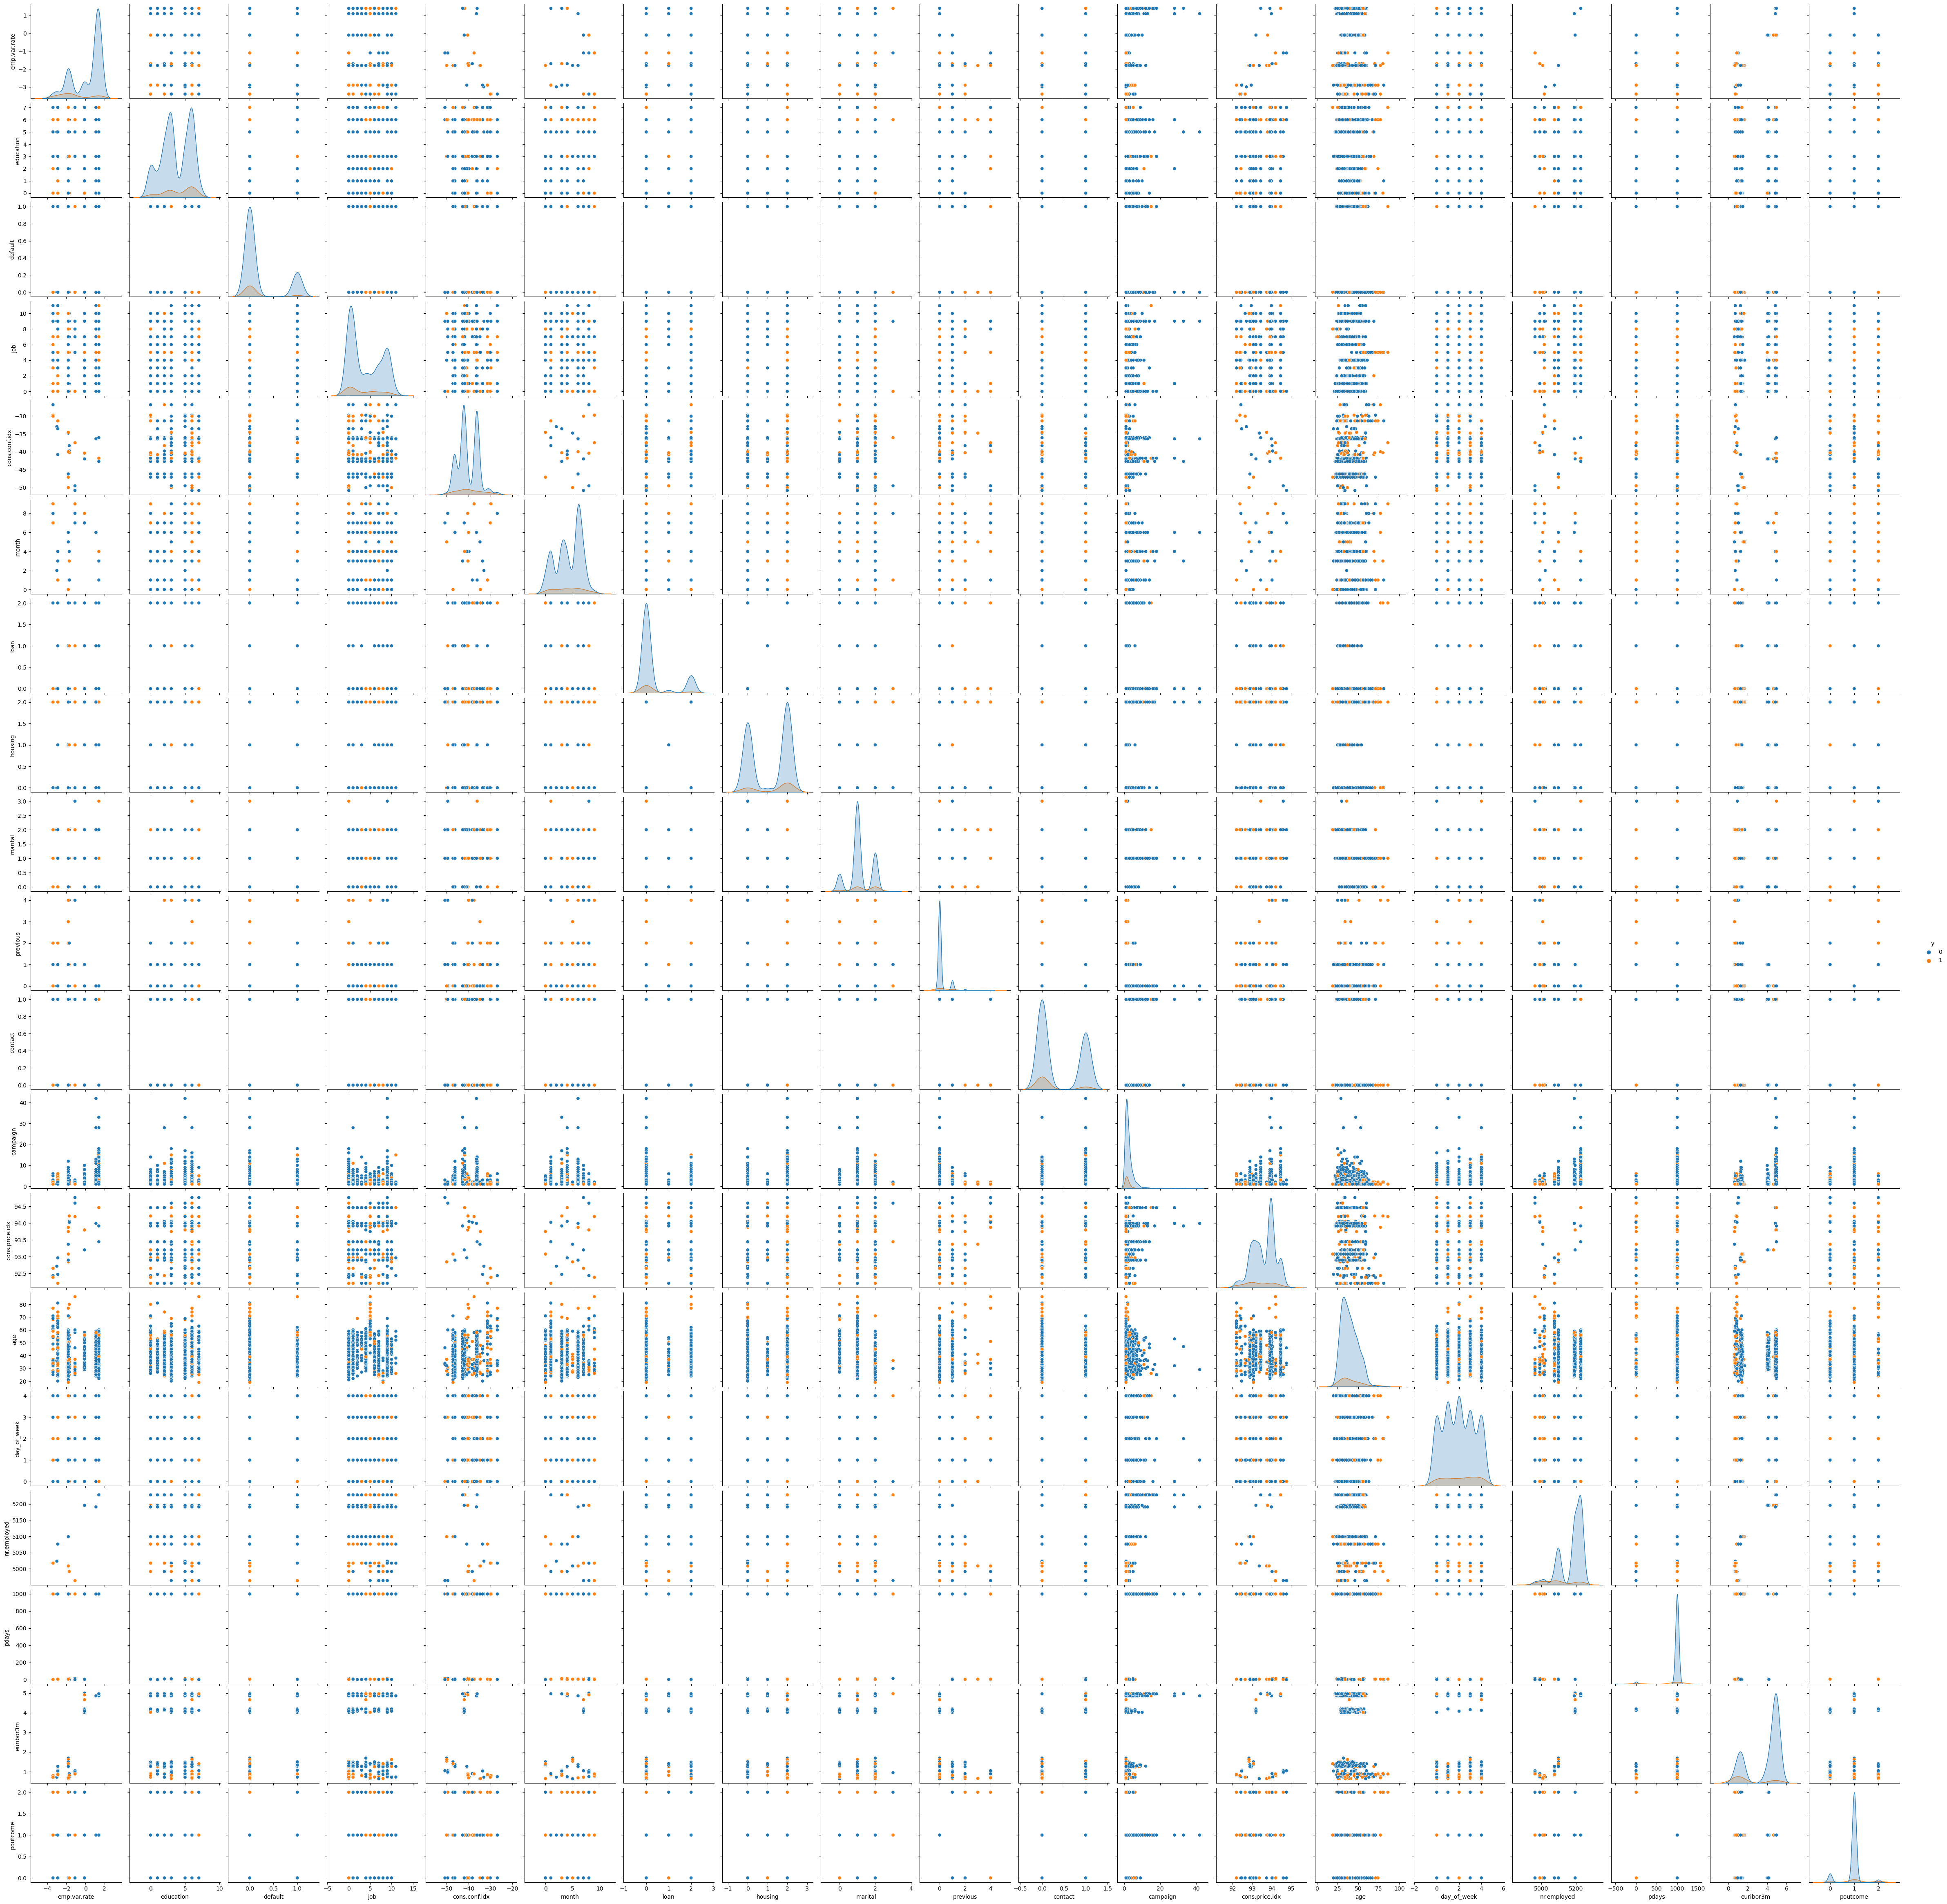

In [115]:
# Do pair plot between features and target
sns.pairplot(sample_df, hue='y')
plt.show()

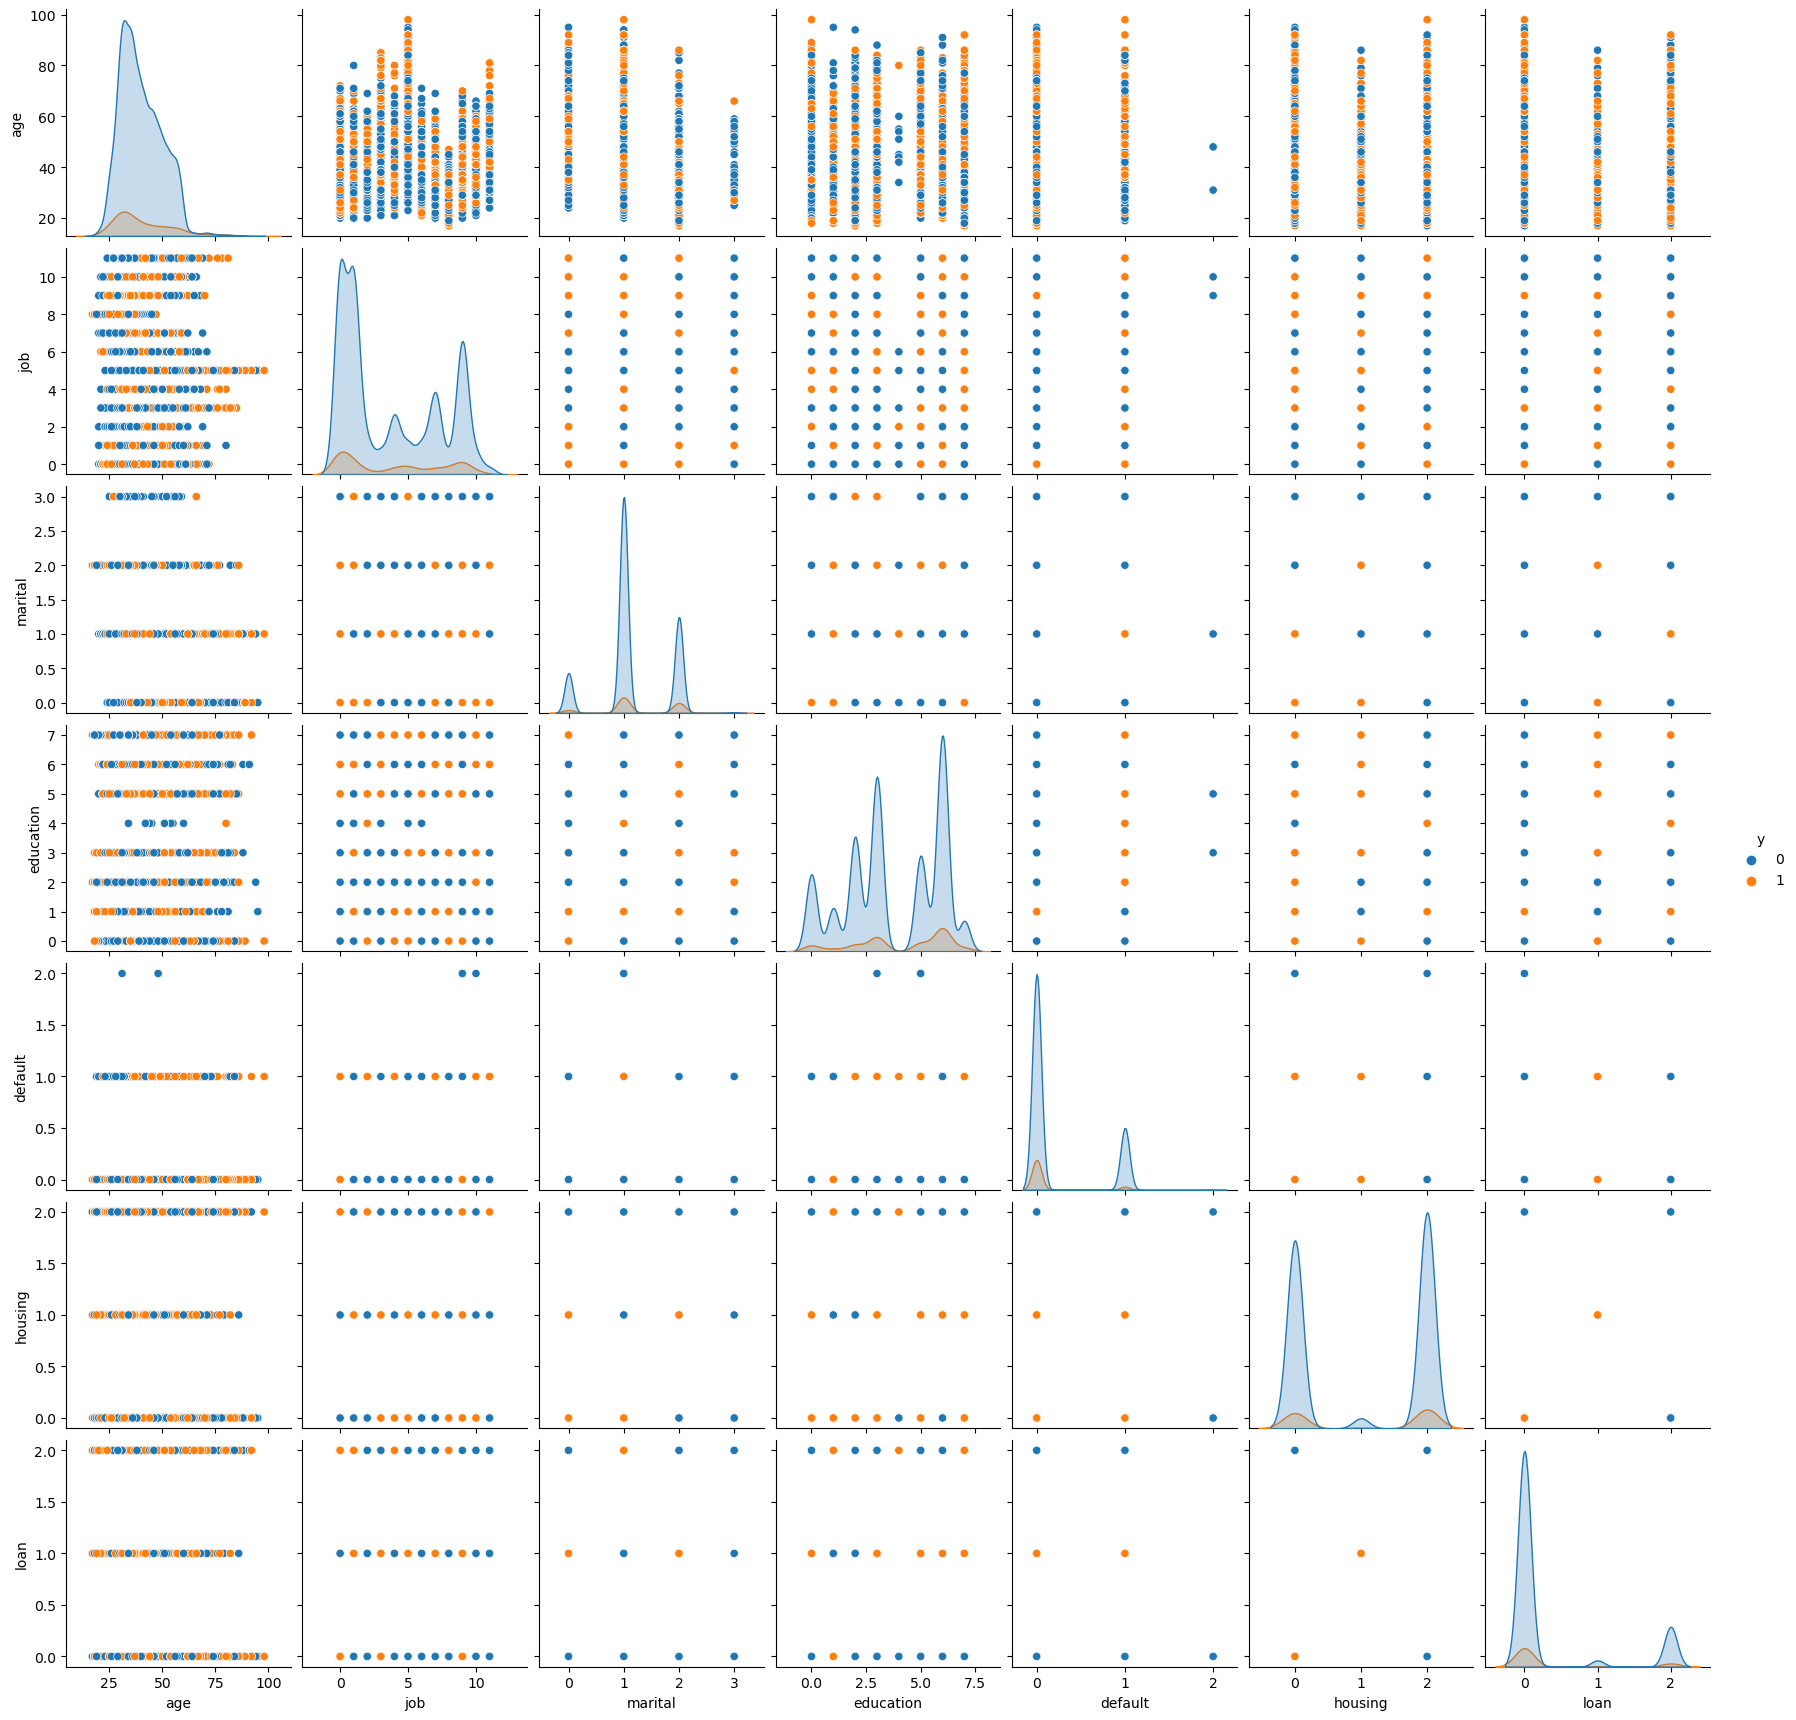

In [142]:
# Devide the features
# bank client data:
bank_client_data_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']

sample_df_bcdf = df[['y'] + bank_client_data_features]
sample_df_bcdf.sample(n=2000, random_state=42)
sns.pairplot(sample_df_bcdf, hue='y')
plt.show()

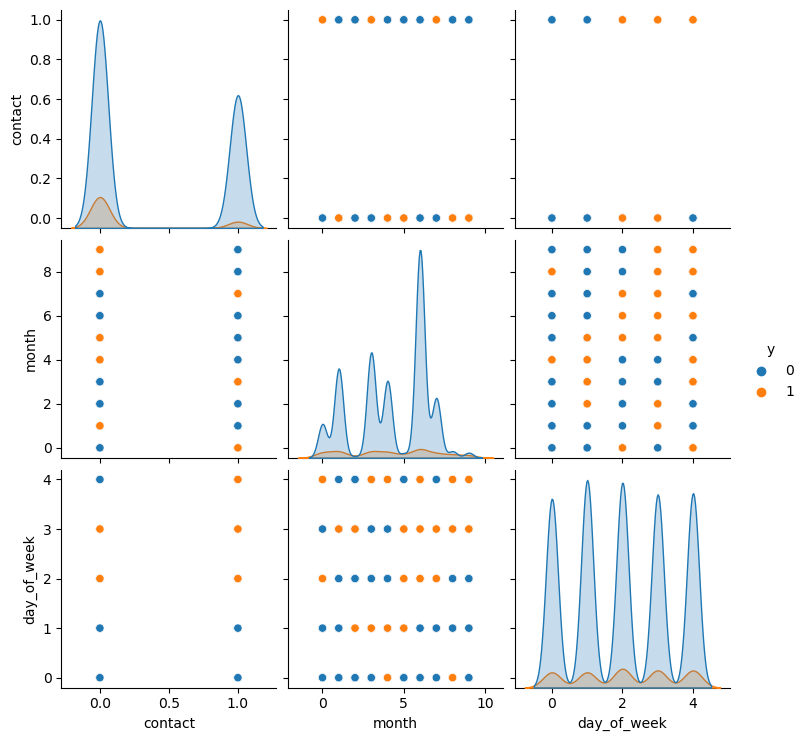

In [138]:
# related with the last contact of the current campaign:
last_contact_features = ['contact', 'month', 'day_of_week']

sample_df_lcf = df[['y'] + last_contact_features]
sample_df_lcf.sample(n=1000, random_state=42)
sns.pairplot(sample_df_lcf, hue='y')
plt.show()

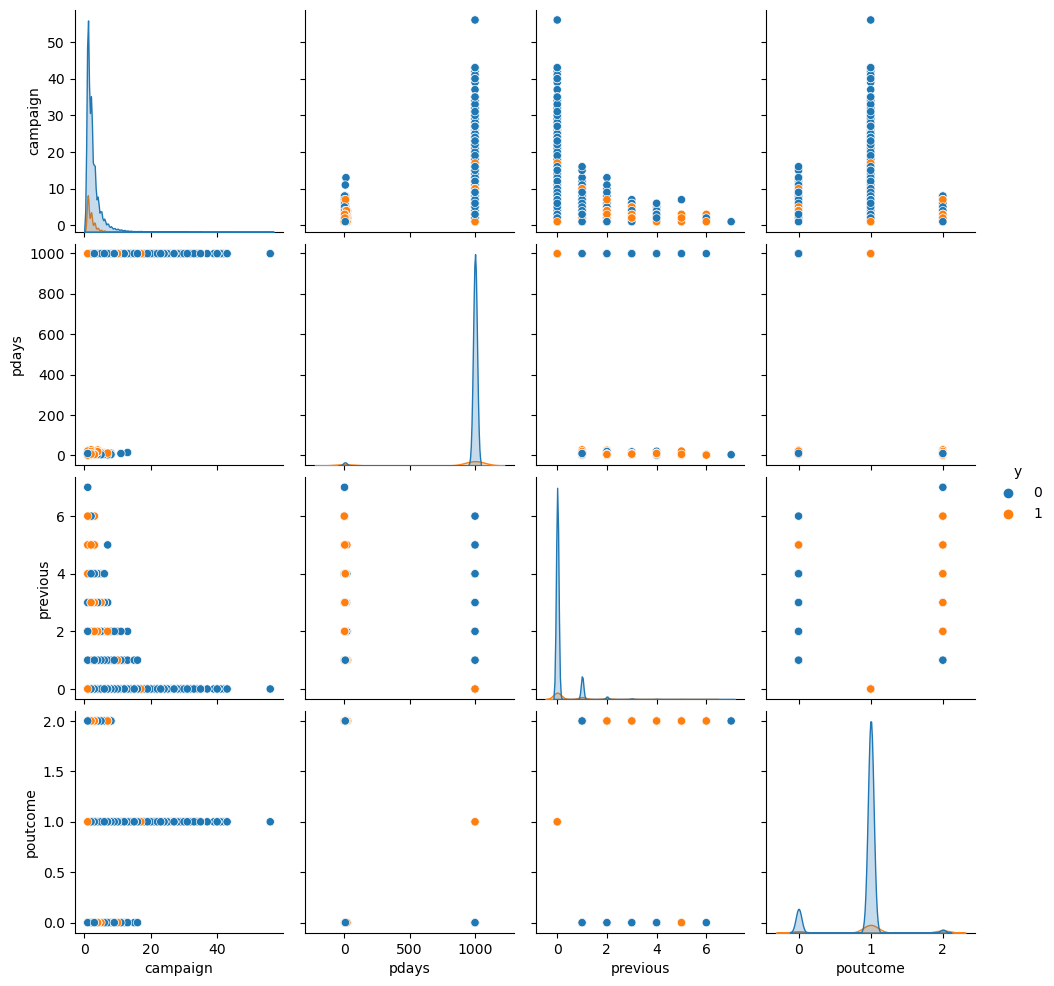

In [140]:
# other attributes:
other_attributes_features = ['campaign', 'pdays', 'previous', 'poutcome']

sample_df_otf = df[['y'] + other_attributes_features]
sample_df_otf.sample(n=1000, random_state=42)
sns.pairplot(sample_df_otf, hue='y')
plt.show()

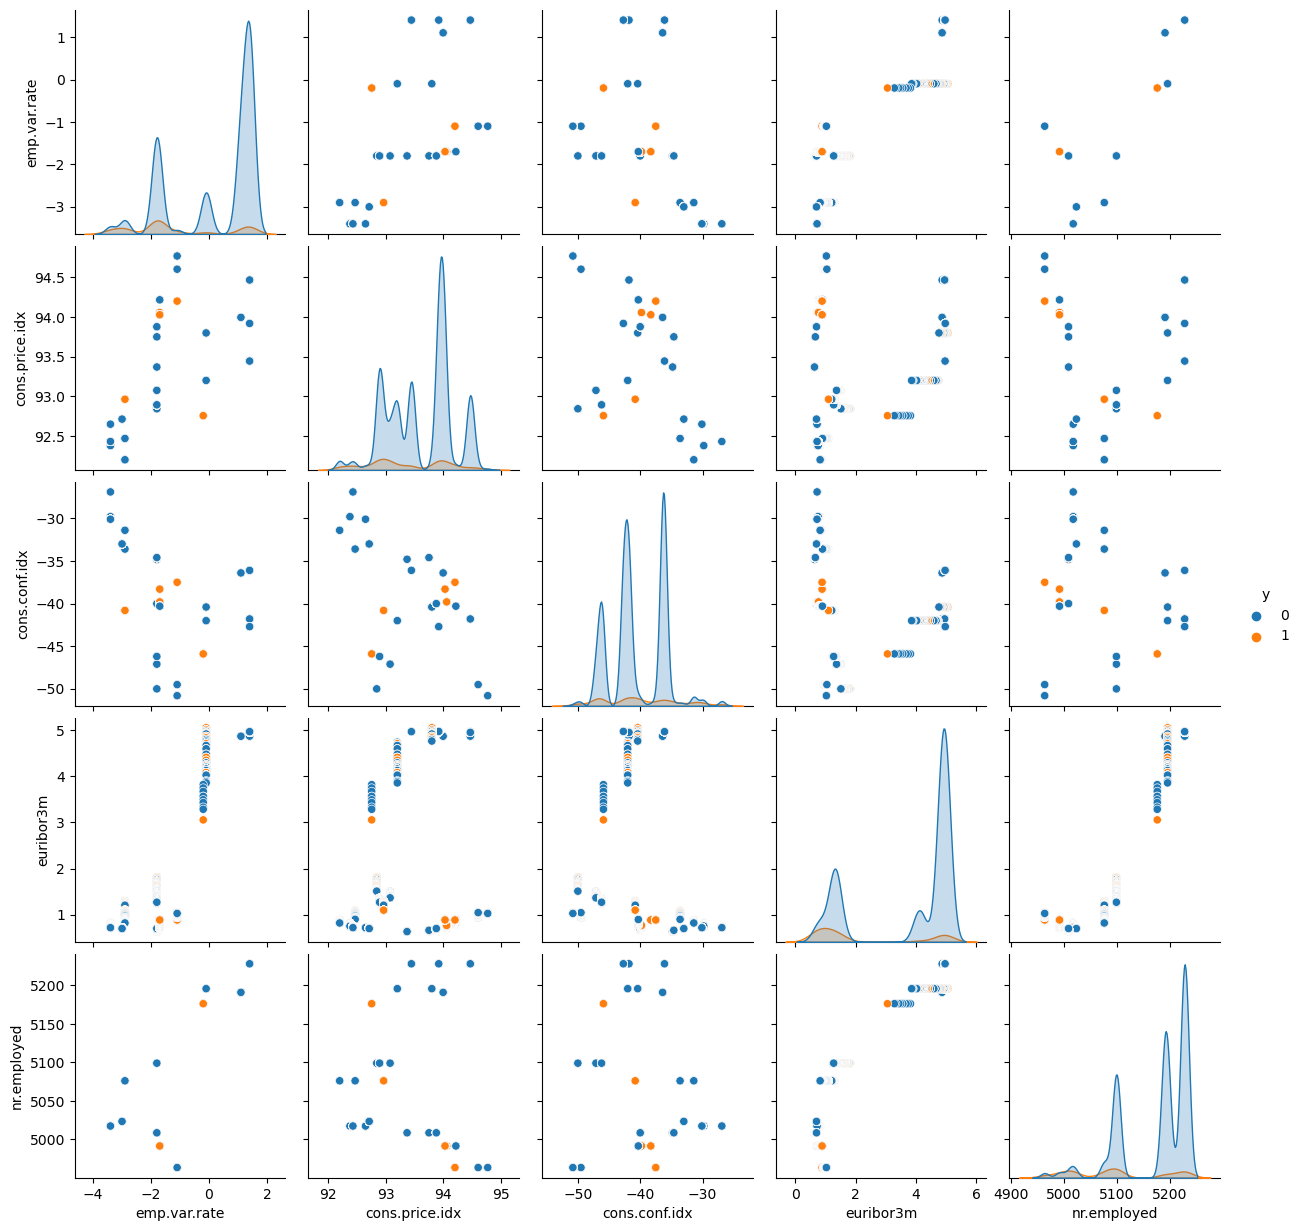

In [141]:
# social and economic context attributes:
social_econonmic_context_attributes = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

sample_df_secaf = df[['y'] + social_econonmic_context_attributes]
sample_df_secaf.sample(n=1000, random_state=42)
sns.pairplot(sample_df_secaf, hue='y')
plt.show()

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

### Problem 9: Score the Model

What is the accuracy of your model?

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

##### Questions